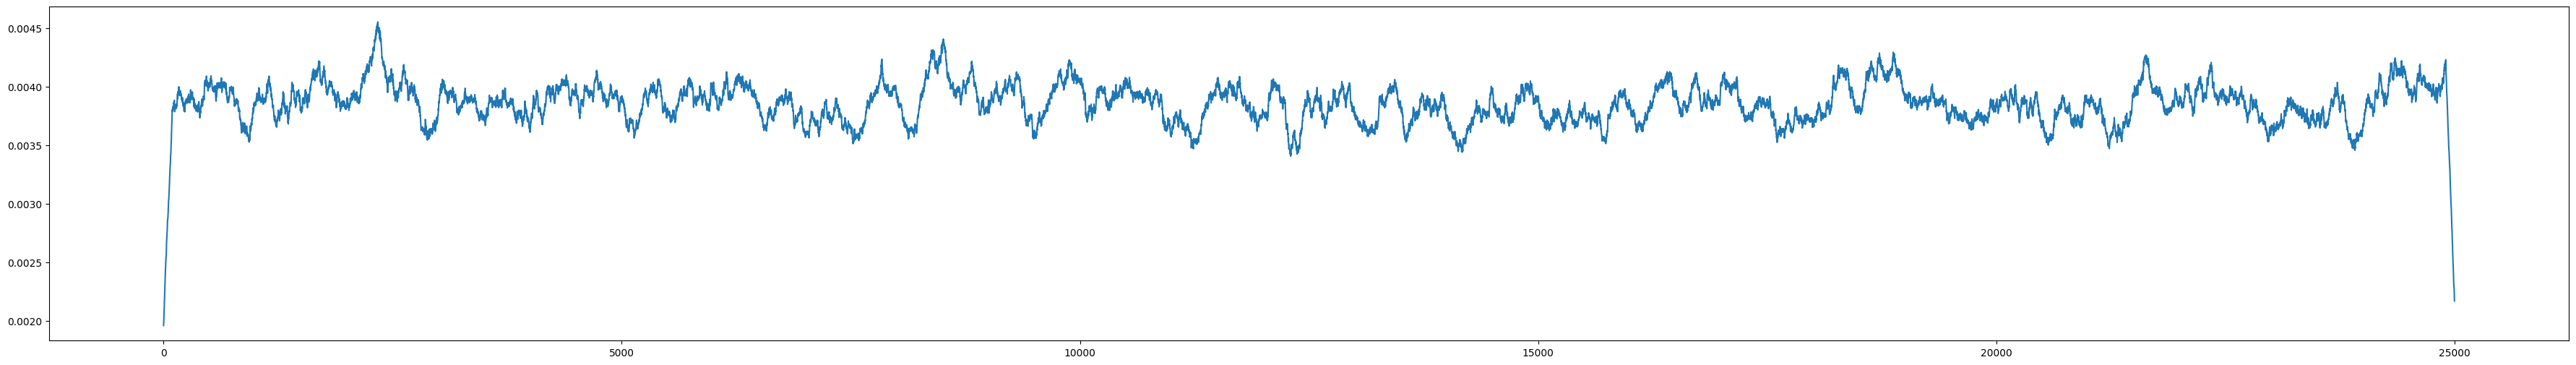

In [14]:

# read uint8 with real to complex conversion - method in program
# filter, decimate, abs, smooth plot
# signals seems just noise

import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

samples = np.fromfile('../data/ct9_160601530mhz.s8', np.uint8)
arr = samples[200_000_000:205_000_000]

iq = arr.astype(np.float32).view(np.complex64)
iq /= 127.5
iq -= 1 + 1j
arr = iq.copy()

t = np.arange(len(arr))/1024000
p = np.exp(2j*np.pi*t*101530)
h = signal.firwin(501, 0.02, pass_zero=True)


arr = arr * p
arr = signal.convolve(arr, h, 'same')
arr = arr[::100]
arr = np.abs(arr)
arr = signal.convolve(arr, [1]*189, 'same')/189

plt.figure(figsize=(45,6))
plt.plot(arr)
plt.show()

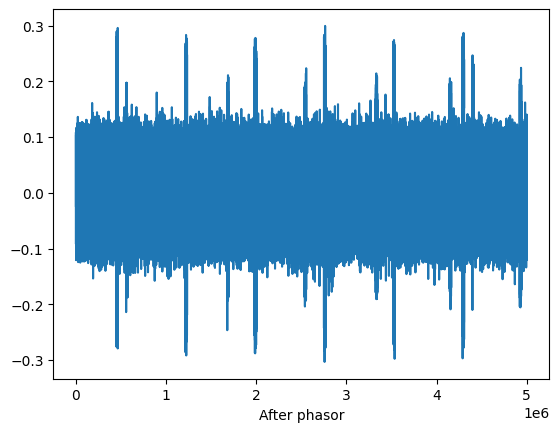

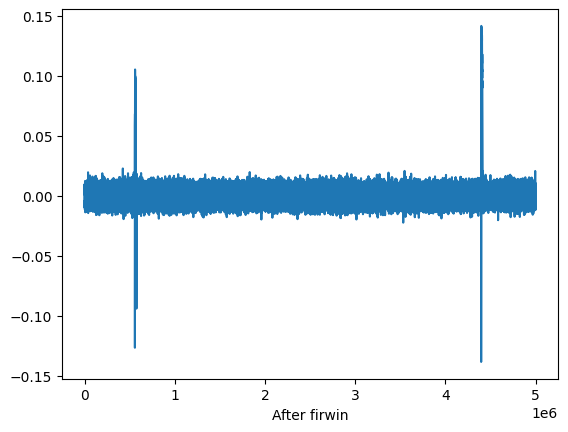

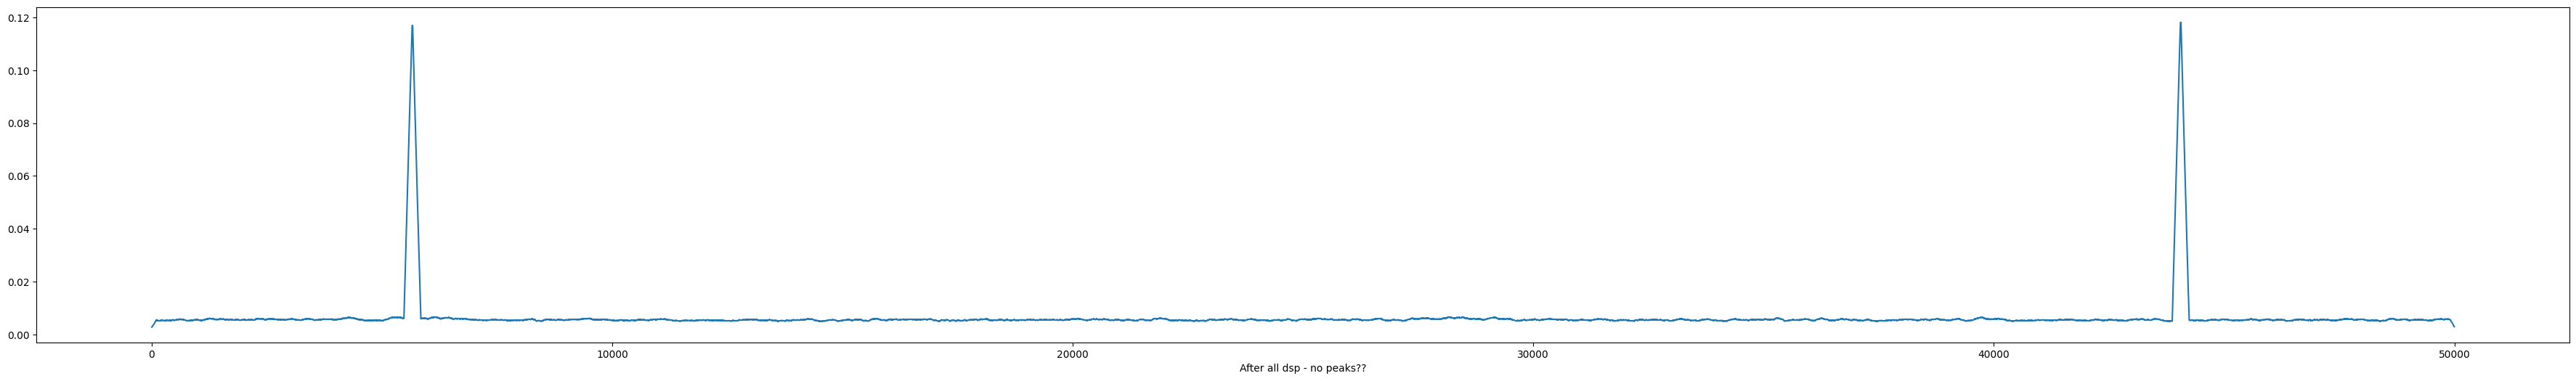

In [20]:

# read uint8 without real to complex conversion - method in program
# filter, decimate, abs, smooth plot
# signal beeps clear in plot

import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

samples = np.fromfile('../data/ct8_160601530mhz.s8', np.uint8)
x = samples[200_000_000:210_000_000]
x = x.astype(np.float32)
x = (x - 127) / 128
x = x[::2] + x[1::2]*1j
#x = x.astype(np.float32).view(np.complex64)

t = np.arange(len(x))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*-101530)

x = x * p
plt.plot(x.real)
plt.xlabel("After phasor")
plt.show()
x = signal.convolve(x, h, 'same')
plt.plot(x.real)
plt.xlabel("After firwin")
plt.show()
x = x[::100]
x = np.abs(x)
x = signal.convolve(x, [1]*189, 'same')/189

plt.figure(figsize=(45,6))
plt.plot(x)
plt.xlabel("After all dsp - no peaks??")
plt.show()

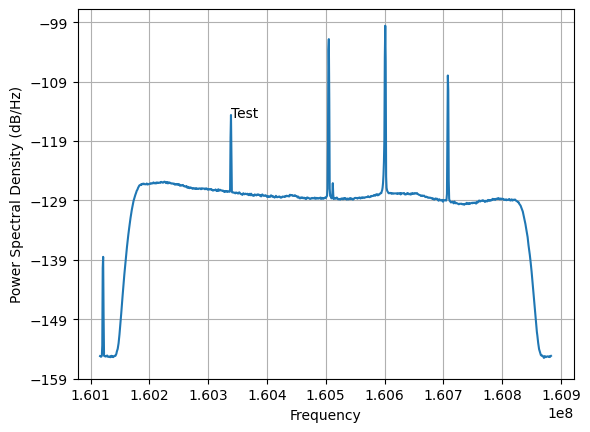

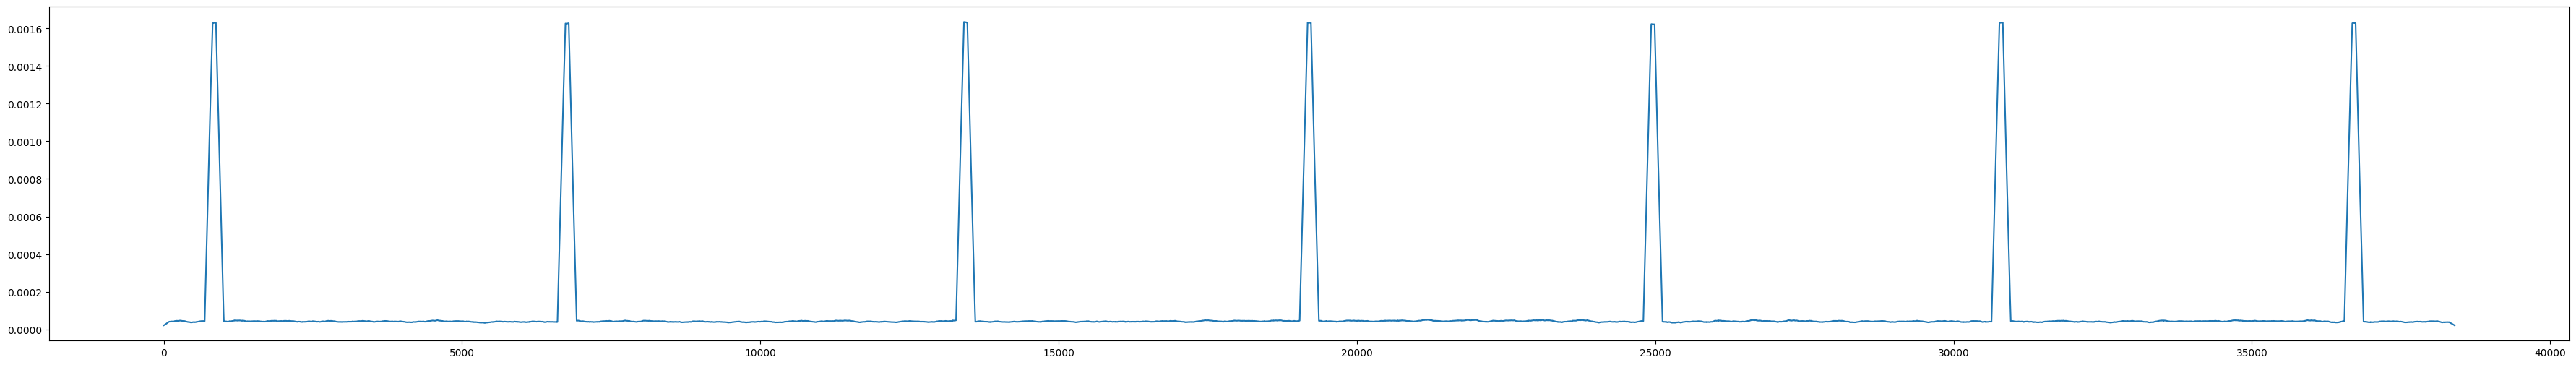

In [57]:
from scipy.io import wavfile

#samples = wavfile.read('../data/test_airspyhf.raw')
samples = np.fromfile('../data/test_airspyhf.fc32', dtype=np.complex64)
sample_rate = 768000
center_freq = 160500000
size = len(samples)
x = samples

fft_freqs = np.linspace(sample_rate / -2, sample_rate / 2, 1024) + center_freq
psd = plt.psd(x, NFFT=1024, Fs=768000, Fc=160500000)
#plt.annotate("Test", xy=(160338000, -115))
plt.show()

t = np.arange(len(x))/768000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*-101530)

x = x * p
x = signal.convolve(x, h, 'same')
x = x[::100]
x = np.abs(x)
x = signal.convolve(x, [1]*189, 'same')/189

plt.figure(figsize=(45,6))
plt.plot(x)
plt.show()

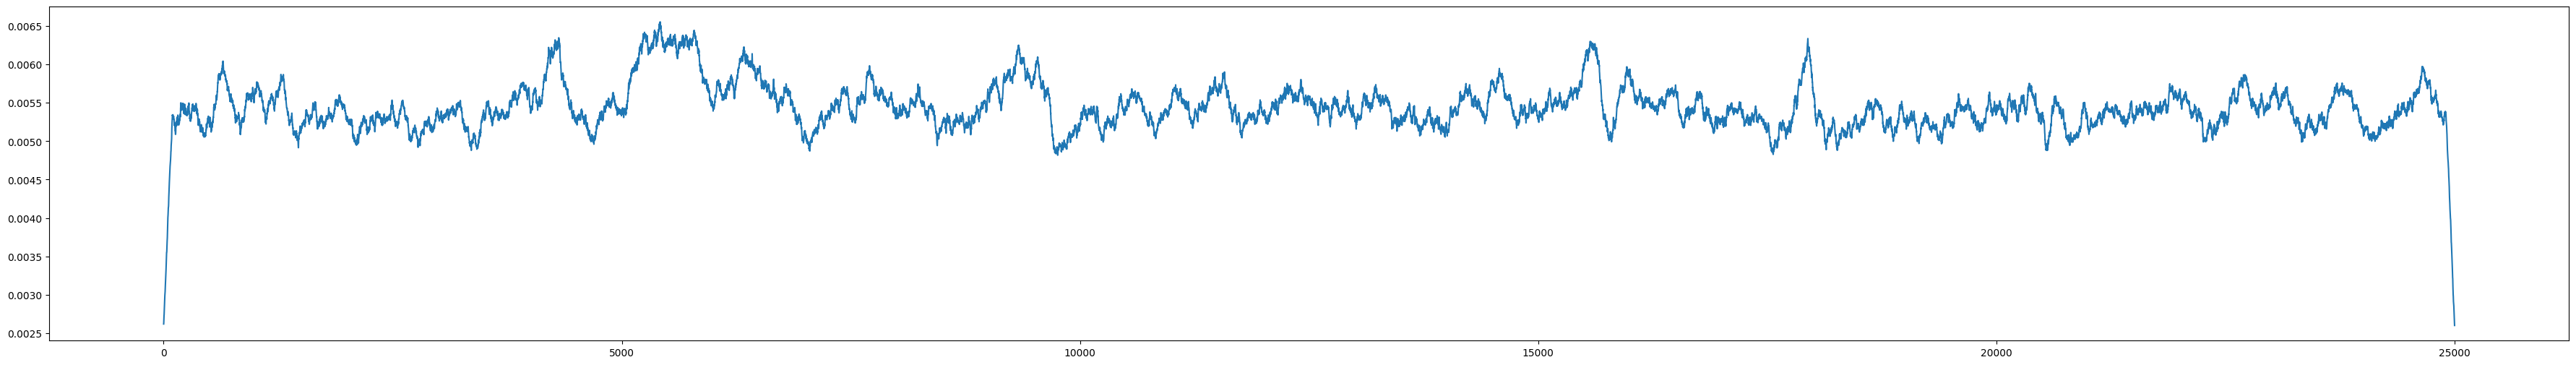

In [5]:
# read uint8 without real to complex conversion - method in program
# filter, decimate, abs, smooth plot
# signal just appears as noise

import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

samples = np.fromfile('../data/ct8_160601530mhz.s8', np.uint8)
x = samples[200_000_000:205_000_000]
x = x.astype(np.float32)
x = (x - 127) / 128
x = x.astype(np.float32).view(np.complex64)

t = np.arange(len(x))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*101530)

x = x * p
x = signal.convolve(x, h, 'same')
x = x[::100]
x = np.abs(x)
x = signal.convolve(x, [1]*189, 'same')/189

plt.figure(figsize=(45,6))
plt.plot(x)
plt.show()